# Exploring Convolutions

In [1]:
# Load ascent image from scipy.
from scipy import misc
ascent_image=misc.ascent()

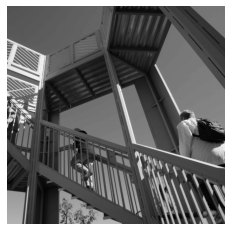

In [2]:
# Drawing image using matplotlib.pyplot
import matplotlib.pyplot as plt
# Visualize the image.
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [3]:
import numpy as np
# Copy image to numpy array
transformed_image= np.array(ascent_image)
# Get the dimensions of the image
size_x=transformed_image.shape[0]
size_y=transformed_image.shape[1]

In [9]:
# Experimenting with different values.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
weight=1

In [14]:
# Iterate over the image
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
        convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
        convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
        convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
        convolution = convolution + (ascent_image[x, y] * filter[1][1])    
        convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
        convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
        convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
        convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
        # Multiply by weight
        convolution = convolution * weight   
      
        # Check the boundaries of the pixel values
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255

        # Load into the transformed image
        transformed_image[x, y] = convolution

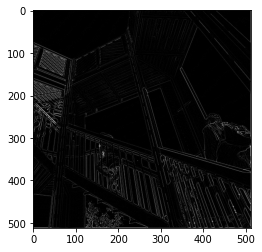

In [19]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(transformed_image)
plt.show()  

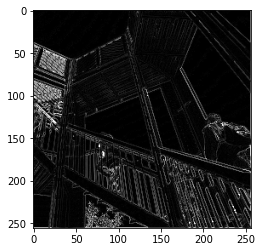

In [21]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
    
        # Store all the pixel values in the (2,2) pool
        pixels = []
        pixels.append(transformed_image[x, y])
        pixels.append(transformed_image[x+1, y])
        pixels.append(transformed_image[x, y+1])
        pixels.append(transformed_image[x+1, y+1])

        # Get only the largest value and assign to the reduced image
        newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      